/var/folders/gd/9mzhm55x2774_fms0y2hrj800000gn/T/ipykernel_3272/2486238632.py:88: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line1.set_data(x1[frame, 0], x1[frame, 1])
/var/folders/gd/9mzhm55x2774_fms0y2hrj800000gn/T/ipykernel_3272/2486238632.py:89: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line2.set_data(x2[frame, 0], x2[frame, 1])
/var/folders/gd/9mzhm55x2774_fms0y2hrj800000gn/T/ipykernel_3272/2486238632.py:90: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line3.set_data(x3[frame, 0], x3[frame, 1])
/var/folders/gd/9mzhm55x2774_fms0y2hrj800000gn/T/ipykernel_3272/2486238632.py:88: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases

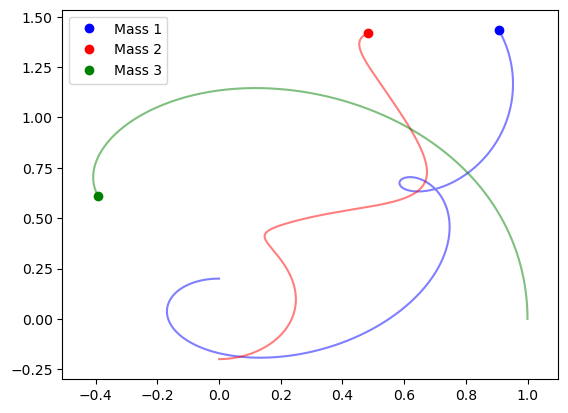

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits import mplot3d

G = 1e-2
m = 1

a = 0.4
R = 1

dt = 0.001
t_f = 20

x1 = np.zeros((int(t_f/dt)+1, 2))
x2 = np.zeros((int(t_f/dt)+1, 2))
x3 = np.zeros((int(t_f/dt)+1, 2))

v1 = np.zeros((int(t_f/dt)+1, 2))
v2 = np.zeros((int(t_f/dt)+1, 2))
v3 = np.zeros((int(t_f/dt)+1, 2))

a1 = np.zeros((int(t_f/dt), 2))
a2 = np.zeros((int(t_f/dt), 2))
a3 = np.zeros((int(t_f/dt), 2))

com = np.zeros((int(t_f/dt), 2))
x1_com = np.zeros((int(t_f/dt), 2))
x2_com = np.zeros((int(t_f/dt), 2))
x3_com = np.zeros((int(t_f/dt), 2))

# Initial conditions:
x1[0][1] = a/2
v1[0][0] = -np.sqrt((G*m)/(2*a))

x2[0][1] = -a/2
v2[0][0] = np.sqrt((G*m)/(2*a))

x3[0][0] = R
v3[0][1] = np.sqrt((3*G*m)/R)

def norm(v):
    return np.vdot(v,v)**0.5

i = 0
while i < int(t_f/dt):

    a1[i] = ((G*m)/(norm(x1[i]-x2[i])**3)) * (x2[i] - x1[i]) + ((G*m)/(norm(x1[i] - x3[i])**3)) * (x3[i] - x1[i])
    a2[i] = ((G*m)/(norm(x1[i]-x2[i])**3)) * (x1[i] - x2[i]) + ((G*m)/(norm(x2[i] - x3[i])**3)) * (x3[i] - x2[i])
    a3[i] = ((G*m)/(norm(x1[i]-x3[i])**3)) * (x1[i] - x3[i]) + ((G*m)/(norm(x2[i] - x3[i])**3)) * (x2[i] - x3[i])

    v1[i+1] = v1[i] + a1[i]*dt
    v2[i+1] = v2[i] + a2[i]*dt
    v3[i+1] = v3[i] + a3[i]*dt

    x1[i+1] = x1[i] + v1[i]*dt + 0.5*a1[i]*dt**2
    x2[i+1] = x2[i] + v2[i]*dt + 0.5*a2[i]*dt**2
    x3[i+1] = x3[i] + v3[i]*dt + 0.5*a3[i]*dt**2

    com[i] = (x1[i]+x2[i]+x3[i]) / 3

    x1_com[i] = x1[i] #- com[i]
    x2_com[i] = x2[i] #- com[i]
    x3_com[i] = x3[i] #- com[i]

    i += 1

x_min = min(x1[:, 0].min(), x2[:, 0].min(), x3[:, 0].min())
x_max = max(x1[:, 0].max(), x2[:, 0].max(), x3[:, 0].max())
y_min = min(x1[:, 1].min(), x2[:, 1].min(), x3[:, 1].min())
y_max = max(x1[:, 1].max(), x2[:, 1].max(), x3[:, 1].max())

fig, ax = plt.subplots()
ax.set_xlim(x_min - 0.1, x_max + 0.1)
ax.set_ylim(y_min - 0.1, y_max + 0.1)

line1, = ax.plot([], [], 'bo', label="Mass 1")
line2, = ax.plot([], [], 'ro', label="Mass 2")
line3, = ax.plot([], [], 'go', label="Mass 3")

traj1, = ax.plot([], [], 'b', alpha=0.5)
traj2, = ax.plot([], [], 'r', alpha=0.5)
traj3, = ax.plot([], [], 'g', alpha=0.5)

def update(frame):
    line1.set_data(x1[frame, 0], x1[frame, 1])
    line2.set_data(x2[frame, 0], x2[frame, 1])
    line3.set_data(x3[frame, 0], x3[frame, 1])
    
    traj1.set_data(x1[:frame, 0], x1[:frame, 1])
    traj2.set_data(x2[:frame, 0], x2[:frame, 1])
    traj3.set_data(x3[:frame, 0], x3[:frame, 1])
    
    return line1, line2, line3, traj1, traj2, traj3


anim = FuncAnimation(fig, update, frames=range(0, int(t_f/dt), 10), blit=True)
anim.save('three_body_problem_trajectory.gif', writer=PillowWriter(fps=30))

plt.legend()
plt.show()